## Использование генетических алгоритмов для поиска глобального экстремума


$ f(x,y) = \cos( 3.3 * \sqrt{(2.2x-0.9)^2 + (2y-1.2)^2} ) +4y + \sin(4x) $


In [37]:
from IPython.display import display
import numpy as np
import pandas as pd

# область определения функции
XMIN = 0.0
XMAX = 1.0
YMIN = 0.1
YMAX = 1.0

# фитнесс-функция
def f(x,y): 
    return np.cos( 3.3*np.sqrt((2.2*x-0.9)**2 + (2*y-1.2)**2) + 4.0*y + np.sin(4*x))


<IPython.core.display.Javascript object>


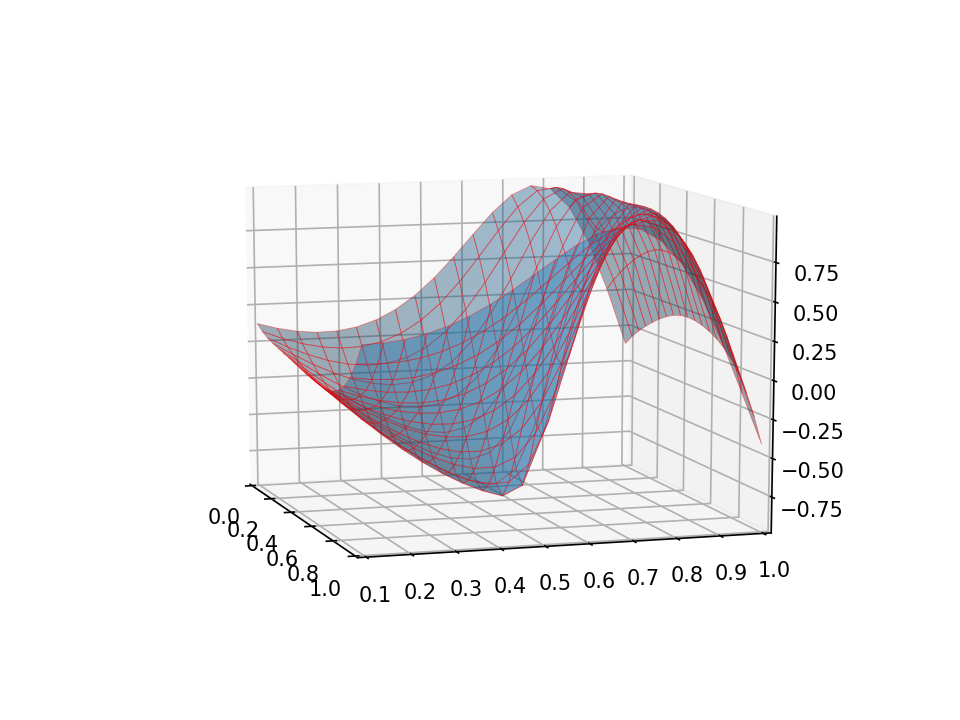

In [38]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt

X,Y = np.meshgrid(np.linspace(XMIN, XMAX, num=20), np.linspace(YMIN, YMAX, num=20))
Z = f(X,Y)

ax = plt.figure().add_subplot(projection='3d')

ax.set_xlim(XMIN, XMAX)
ax.set_ylim(YMIN, YMAX)
ax.plot_surface(X,Y,Z, lw=0.4, alpha=0.4, edgecolor='red')
#ax.contourf(x, y, z, zdir='z', offset=-1.1, cmap='coolwarm')
plt.show()

In [45]:
# Параметры модели

N  = 30   # количество особей в популяции

NL = 10   # количество выживающих при отборе
NC =  8   # количество скрещиваний
NM =  3   # количество мутаций (из всех скрещиваний)

MX = 0.02 # диапазон отклонения мутации по оси OX
MY = 0.02 # диапазон отклонения мутации по оси OY

assert N  >= NL, "Количество выживающих ограничено размером популяции"
assert NM <= NC, "Количество мутаций ограничено количеством скрещиваний"


In [46]:
# создание популяции
def create():
    x = pd.Series(np.random.default_rng().uniform(XMIN, XMAX, N))
    y = pd.Series(np.random.default_rng().uniform(YMIN, YMAX, N))
    z = pd.Series(f(x,y))
    p = pd.DataFrame({'x': x, 'y': y, 'z': z})
    return p

# естественный отбор
def selection(p):
    return p.sort_values(by='z', ascending=True).head(NL) #[:NL]

# скрещивание
def cross(p):
    # выбор особей для скрещивания
    mi = np.random.choice(NL, NC)
    fi = np.random.choice(NL, NC)
    pm  = p.iloc[mi]
    pf  = p.iloc[fi]
    
    # генотип новых особей
    nx = []
    ny = []
    #display(p, mi, fi)
    for i in range(NC):
        nx.append(pf.x.iloc[i])        
        ny.append(pm.y.iloc[i])
        
    mx = np.random.choice(NC, NM) # индексы мутаций гена y
    dx = MX*np.random.random(NM)-MX/2.0
    # мутации гена x
    for mi,i in enumerate(mx):
        nx[i] += min(XMAX, max(XMIN, dx[mi]))

    my = np.random.choice(NC, NM)
    dy = MY*np.random.random(NM)-MY/2.0
    for mi,i in enumerate(my):
        ny[i] += min(YMAX, max(YMIN, dy[mi]))
    
    # создание нового поколения
    x  = pd.Series(nx)
    y  = pd.Series(ny)
    z  = pd.Series(f(x, y))
    pp = pd.DataFrame({'x': x, 'y': y, 'z': z})
    return pd.concat([p, pp])

def step(p):
    #display(p)
    pp = selection(p)
    #display(pp)
    ppp = cross(pp)
    #display(ppp)
    return ppp
    


<IPython.core.display.Javascript object>


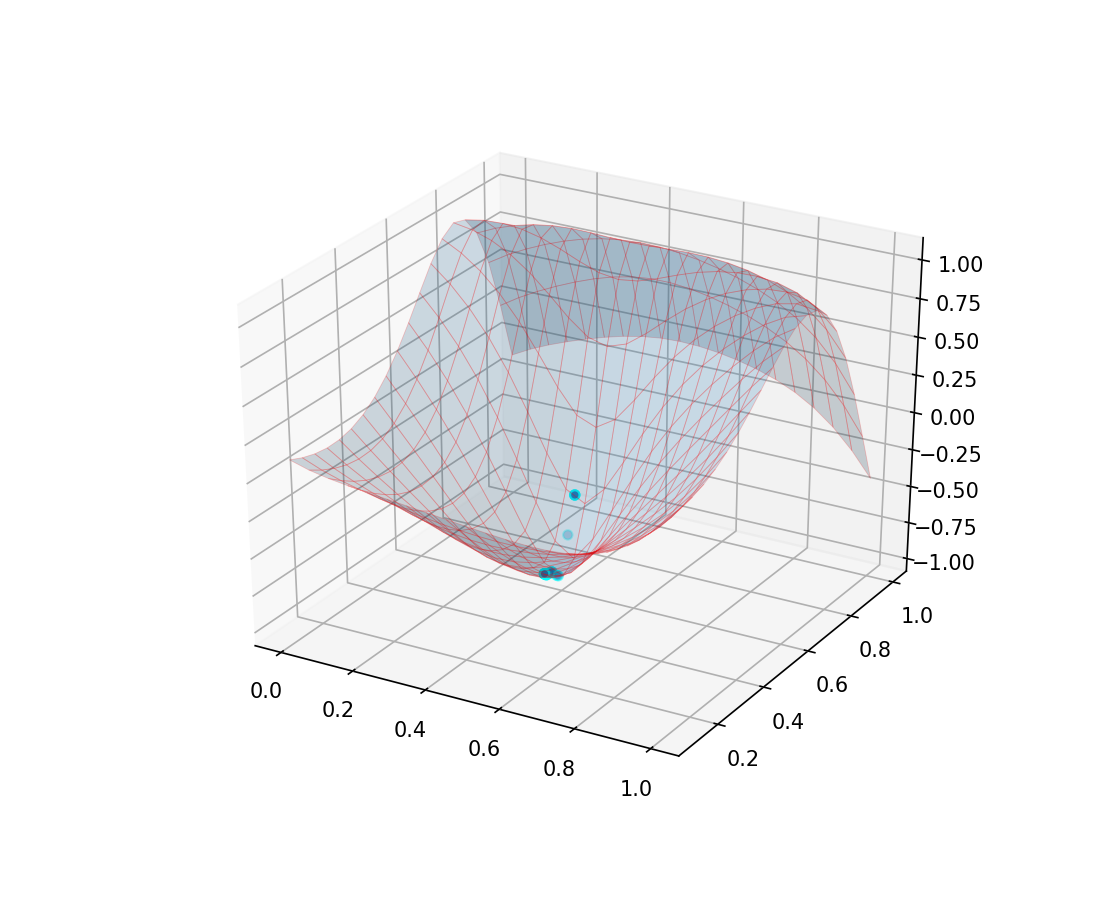

In [47]:
import ipywidgets as widgets

global P, AX, FIG
#P = create()

FIG = plt.figure()
AX = None
#ax = plt.figure().add_subplot(projection='3d')
#ax.plot_surface(X,Y,Z, lw=0.4, alpha=0.2, edgecolor='red')
#AX.scatter(P.x,P.y,P.z)

def draw(p):
    global AX, FIG
    #if AX: AX.remove()
    plt.clf()
    AX = FIG.add_subplot(projection='3d')
    AX.plot_surface(X,Y,Z, lw=0.4, alpha=0.2, edgecolor='red')
    AX.scatter(p.x,p.y,p.z, edgecolor='cyan')
    #ax.stem(x, y, z)
    #plt.show()
    #plt.draw()
    #display(FIG)
    #return ax

bstart = widgets.Button(description='Start')
def onStart(b):
    global P
    P = create()
    draw(P)
bstart.on_click(onStart)

bstep = widgets.Button(description='Step')
def onStep(b):
    global P
    P = step(P)
    draw(P)
bstep.on_click(onStep)

display(widgets.HBox([bstart, bstep]))
onStart(None)

In [218]:
AX?